In [ ]:
! python --version


Python 3.7.11


In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
tf.random.set_seed(1234)

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from numpy.random import seed
seed(1)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import LSTM, Dense

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP projects/Electriity_forcast/dccelectricitycivicsblocks34p20130221-1840.csv', engine ='python', skipfooter =3)
df.head(5)

,Civic Offices Blocks 3 and 4 KWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,...,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,57.30000305,52.95000076,48.29999924,47.40000153,44.55000305,40.20000076,40.20000076,40.5,40.95000076,38.55000305,39,36.75,37.65000153,34.95000076,34.95000076,33.90000153,30.30000114,31.80000305,32.70000076,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,31.5,30.00000191,32.85000229,27.45000076,27.90000153,27.90000153,32.10000229,31.5,28.79999924,33.15000153,32.40000153,32.40000153,34.05000305,41.55000305,38.25,47.40000153,49.95000458,60.30000305,58.80000305,62.25,61.35000229,66.59999847,68.40000153,66,71.25,71.70000458,72.45000458,74.70000458,73.05000305,69.75,...,71.8500061,73.05000305,72.15000153,70.65000153,70.80000305,73.65000153,75.90000916,68.25,69.15000153,66.30000305,60.45000458,52.79999924,57.90000153,54.45000458,53.55000305,53.85000229,47.85000229,47.70000076,45.60000229,47.85000229,46.20000076,48.15000153,46.20000076,40.80000305,35.70000076,34.20000076,34.05000305,34.05000305,34.20000076,33.75000381,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,34.65000153,35.25,36,33.60000229,35.70000076,33,30.75,31.35000229,33.30000305,33.15000153,33.45000076,38.25,37.65000153,41.40000153,46.05000305,47.85000229,46.95000076,59.40000153,63.15000153,63.75,69,67.20000458,69.45000458,72.15000153,69.90000153,73.65000153,70.94999695,79.19999695,74.40000153,71.8500061,...,74.25,73.20000458,72,73.5,72.75,73.3500061,75.6000061,76.20000458,72.90000153,75.15000153,62.55000305,60.45000458,57.75,50.40000153,53.85000229,50.70000458,47.85000229,47.10000229,47.85000229,45.30000305,43.80000305,43.80000305,42.15000153,42.60000229,42.45000458,42.30000305,40.5,38.70000076,39.30000305,36,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,33.15000153,32.70000076,33,30.15000153,33.00000381,31.20000076,34.20000076,32.40000153,34.20000076,31.95000076,29.40000153,36.60000229,34.05000305,38.10000229,39.45000076,44.25000381,44.85000229,52.80000305,55.8000030

In [ ]:
# REnaming columns with 1st row
df2 =df.rename(columns = df.iloc[0])

df2.head()

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,...,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,...,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,57.30000305,52.95000076,48.29999924,47.40000153,44.55000305,40.20000076,40.20000076,40.5,40.95000076,38.55000305,39,36.75,37.65000153,34.95000076,34.95000076,33.90000153,30.30000114,31.80000305,32.70000076,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,31.5,30.00000191,32.85000229,27.45000076,27.90000153,27.90000153,32.10000229,31.5,28.79999924,33.15000153,32.40000153,32.40000153,34.05000305,41.55000305,38.25,47.40000153,49.95000458,60.30000305,58.80000305,62.25,61.35000229,66.59999847,68.40000153,66,71.25,71.70000458,72.45000458,74.70000458,73.05000305,69.75,...,71.8500061,73.05000305,72.15000153,70.65000153,70.80000305,73.65000153,75.90000916,68.25,69.15000153,66.30000305,60.45000458,52.79999924,57.90000153,54.45000458,53.55000305,53.85000229,47.85000229,47.70000076,45.60000229,47.85000229,46.20000076,48.15000153,46.20000076,40.80000305,35.70000076,34.20000076,34.05000305,34.05000305,34.20000076,33.75000381,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,34.65000153,35.25,36,33.60000229,35.70000076,33,30.75,31.35000229,33.30000305,33.15000153,33.45000076,38.25,37.65000153,41.40000153,46.05000305,47.85000229,46.95000076,59.40000153,63.15000153,63.75,69,67.20000458,69.45000458,72.15000153,69.90000153,73.65000153,70.94999695,79.19999695,74.40000153,71.8500061,...,74.25,73.20000458,72,73.5,72.75,73.3500061,75.6000061,76.20000458,72.90000153,75.15000153,62.55000305,60.45000458,57.75,50.40000153,53.85000229,50.70000458,47.85000229,47.10000229,47.85000229,45.30000305,43.80000305,43.80000305,42.15000153,42.60000229,42.45000458,42.30000305,40.5,38.70000076,39.30000305,36,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,33.15000153,32.70000076,33,30.15000153,33.00000381,31.20000076,34.20000076,32.40000153,34.20000076,31.95000076,29.40000153,36.60000229,34.05000305,38.10000229,39.45000076,44.25000381,44.85000229,52.80000305,55.80000305,63.30000305,63.75000381,67.80000305,64.94999695,69.30000305,69.6000061,72.6000061,74.40000153,76.20000458,74.55000305,72.75,...,67.20000458,73.5,73.80000305,70.20000458,70.80000305,66.45000458,73.5,72,69.15000153,69.75,60.45000076,58.65000153,55.35000229,57.59999847,55.80000305,47.40000153,46.20000076,43.95000076,43.05000305,42.60000229,39.15000153,37.20000076,34.05000305,34.35000229,34.65000153,33.90000153,31.50000191,31.95000076,34.20000076,32.10000229,32.25,33.45000076,33,30.4500007

In [ ]:
df3 = df2.drop(df.index[0])
df3.head()
#df3.index[0]

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,...,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,57.30000305,52.95000076,48.29999924,47.40000153,44.55000305,40.20000076,40.20000076,40.5,40.95000076,38.55000305,39,36.75,37.65000153,34.95000076,34.95000076,33.90000153,30.30000114,31.80000305,32.70000076,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,31.5,30.00000191,32.85000229,27.45000076,27.90000153,27.90000153,32.10000229,31.5,28.79999924,33.15000153,32.40000153,32.40000153,34.05000305,41.55000305,38.25,47.40000153,49.95000458,60.30000305,58.80000305,62.25,61.35000229,66.59999847,68.40000153,66,71.25,71.70000458,72.45000458,74.70000458,73.05000305,69.75,...,71.8500061,73.05000305,72.15000153,70.65000153,70.80000305,73.65000153,75.90000916,68.25,69.15000153,66.30000305,60.45000458,52.79999924,57.90000153,54.45000458,53.55000305,53.85000229,47.85000229,47.70000076,45.60000229,47.85000229,46.20000076,48.15000153,46.20000076,40.80000305,35.70000076,34.20000076,34.05000305,34.05000305,34.20000076,33.75000381,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,34.65000153,35.25,36,33.60000229,35.70000076,33,30.75,31.35000229,33.30000305,33.15000153,33.45000076,38.25,37.65000153,41.40000153,46.05000305,47.85000229,46.95000076,59.40000153,63.15000153,63.75,69,67.20000458,69.45000458,72.15000153,69.90000153,73.65000153,70.94999695,79.19999695,74.40000153,71.8500061,...,74.25,73.20000458,72,73.5,72.75,73.3500061,75.6000061,76.20000458,72.90000153,75.15000153,62.55000305,60.45000458,57.75,50.40000153,53.85000229,50.70000458,47.85000229,47.10000229,47.85000229,45.30000305,43.80000305,43.80000305,42.15000153,42.60000229,42.45000458,42.30000305,40.5,38.70000076,39.30000305,36,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,33.15000153,32.70000076,33,30.15000153,33.00000381,31.20000076,34.20000076,32.40000153,34.20000076,31.95000076,29.40000153,36.60000229,34.05000305,38.10000229,39.45000076,44.25000381,44.85000229,52.80000305,55.80000305,63.30000305,63.75000381,67.80000305,64.94999695,69.30000305,69.6000061,72.6000061,74.40000153,76.20000458,74.55000305,72.75,...,67.20000458,73.5,73.80000305,70.20000458,70.80000305,66.45000458,73.5,72,69.15000153,69.75,60.45000076,58.65000153,55.35000229,57.59999847,55.80000305,47.40000153,46.20000076,43.95000076,43.05000305,42.60000229,39.15000153,37.20000076,34.05000305,34.35000229,34.65000153,33.90000153,31.50000191,31.95000076,34.20000076,32.10000229,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,02/04/2011,96,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,28.80000114,33.45000076,31.80000114,33.75,30.45000076,32.40000153,30.15000153,29.55000114,28.5,33.45000076,31.50000191,28.80000114,32.25,33.00000381,29.85000229,35.10000229,34.65000153,28.5,32.85000229,30.90000153,30.15000153,31.80000114,31.50000191,33.45000076,32.10000229,34.95000458,34.80000305,32.10000229,32.85

In [ ]:
df3.drop(df3.index[0])
df3.tail()

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,...,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
688,13/02/2013,96,25,25,25.5,24.5,25,26,25.5,25.5,25,25.5,25,25.5,26,27.5,27.5,27,27,27,27,27,26.5,28,28.5,29,31,33.5,36,41,44,47,51,56,57.5,59,59,61.5,60.5,66.5,...,66.5,70,69.5,69.5,70,67,66,66,65,63.5,63.5,61.5,60,56.5,54.5,52.5,51,50,48,42,41,40,39.5,37,37,35.5,34,34,34,33,33,32.5,30.5,27.5,26,26,26,26,25.5,26.5
689,14/02/2013,96,26,25.5,26,25.5,25,27,25.5,26.5,26,27,25.5,26,26,26,26.5,27.5,27,27.5,28,27.5,28,28.5,29,29.5,30,36.5,37.5,42.5,46,49.5,51.5,56.5,56,57.5,59,60.5,59.5,66,...,66,70,70,71,71.5,67.5,66,65,66,63,62.5,61,59.5,56.5,54,50.5,49.5,49,49,45,43.5,41.5,37,35,32.5,32,33,31.5,31.5,32,31,30,30.5,29,28,26.5,25.5,25,25.5,25
690,15/02/2013,96,25.5,24.5,25.5,24.5,25,26.5,25,25.5,26,26,25.5,25.5,25,27,27.5,27.5,27.5,28.5,28,27,27.5,27.5,29.5,30,30.5,35,36,41,45,48.5,50,55.5,56.5,55,57.5,58.5,59,64,...,63,65.5,65,66,65,62,62,60.5,59.5,59.5,59.5,58,57,56.5,53.5,51.5,51.5,50.5,48.5,44.5,44,41,40,36.5,34,33,32,32,32,32,29,27,28,28,25.5,26,25.5,25.5,24.5,25
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,25,25.5,25.5,25,25,25,26,26,25,25.5,26,24.5,25,26,25.5,25,25.5,25,26,26.5,27.5,28.5,27.5,27,27,27.5,28.5,29.5,30,31,...,30,29,29,28.5,27,27.5,27,27,26.5,27,28.5,26.5,28,25.5,26,24,24.5,25.5,25,25,24.5,24.5,25,25,24.5,24.5,24.5,26.5,25.5,24.5,24.5,24,24.5,26,24.5,24,25,24.5,25,24
692,17/02/2013,96,24.5,24,24,24.5,24,24,24.5,24,24,25.5,25.5,24,24,25,24.5,24.5,24.5,25,25.5,25,25,26,24.5,23.5,24.5,25,25,24.5,23.5,25,24,24.5,24,24.5,24.5,24.5,24,24,...,25,25,25.5,24.5,24,25.5,25.5,24.5,26,25,24.5,26.5,23.5,25,25,25,26,26,27,24.5,25.5,25.5,25.5,26,26.5,24,24.5,25,25.5,25,25,25,25,25.5,26.5,25.5,24.5,25,25,25


In [ ]:
df4 = df3.drop('Date', axis=1)
df5 = df4.drop('Values', axis = 1)
df6 = df5.dropna()
df7 = df6.values
type(df7)

numpy.ndarray

In [ ]:
dataset = np.sum(df7, axis = 1,dtype =float)
dataset

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

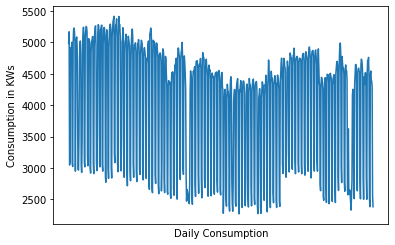

In [ ]:
plt.plot(dataset)
plt.tick_params(
   axis ='x',
   which = 'both',
   bottom = False,
   top = False,
   labelbottom = False)
plt.xlabel('Daily Consumption')
plt.ylabel("Consumption in KWs")
plt.show()

In [ ]:
df = pd.DataFrame(dataset)
df.head(10)

,0
0,4981.500193
1,5166.600164
2,3046.350145
3,3101.100138
4,4908.600164
5,4858.500177
6,4905.000198
7,4999.950195
8,3075.900131
9,3023.550144


In [ ]:
df = np.array(df)

train_size = int(len(df)*0.8)
test_size = len(df) - train_size


In [ ]:
train, test = df[0:train_size,:], df[train_size:len(df),:]

A lookback period is then defined for the model, i.e. how many timesteps do we wish for the model to “look back” when forecasting one-step ahead?
To start off, a lookback period of 5 will be used for this purpose. Depending on the accuracy as measured by the RMSE (root mean squared error), the lookback period can be modified as appropriate.

Now we can define a function to create a new dataset as described above. The function takes two arguments, the dataset which is a NumPy array that we want to convert into a dataset and the look_back which is the number of previous time steps to use as input variables to predict the next time period, in this case, defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

It can be configured and we will look at constructing a differently shaped dataset in the next section.

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(df, previous =1):
  x = []
  y = []
  for i in range(len(df) - previous -1):
    a = df[i: (i+ previous), 0]
    x.append(a)
    y.append(df[i + previous, 0])
  return np.array(x), np.array(y)

#Data Normalization
The data is normalized in order to allow the LSTM model to interpret the data properly.
However, there is a big caveat when it comes to implementing this procedure. The training and test sets must be split separately (as above) before conducting the scaling procedure on each set separately.
A common mistake when implementing an LSTM model is to simply scale the whole dataset. This is erroneous as the scaler will use the values from the test set as a baseline for the scale, resulting in data leakage back to the training set.
For instance, let us suppose that a hypothetical training set has a scale from 1–1000, and the hypothetical test set has a scale from 1–1200. MaxMinScaler will reduce the scale to a number between 0–1. Should the data be scaled across both the training and test set concurrently, then MaxMinScaler will use the 1–1200 scale as the baseline for the training set as well. This means that the new scale across the training set has been compromised by the test set, resulting in unreliable forecasts.
Thus, the data in our example is scaled as follows:

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

If you compare these first 5 rows to the original dataset sample listed in the previous section, you can see the X=t and Y=t+1 pattern in the numbers.

Let’s use this function to prepare the train and test datasets ready for modeling.

In [ ]:
time_step = 5
x_train, y_train = create_dataset(train, time_step)
x_test, y_test = create_dataset(test, time_step)

In [ ]:
 x_train.shape[0]

538

In [ ]:
# reshape input to be [samples, time_steps, fetures]
x_train = np.reshape(x_train, (x_train.shape[0], 1 ,x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1 ,x_test.shape[1]))

In [ ]:
x_train.shape[1]

1

In [ ]:
# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(1, time_step)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             11200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 51,651
Trainable params: 51,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss='mean_squared_error', metrics = ['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
430/430 - 8s - loss: 0.1217 - accuracy: 0.0047 - val_loss: 0.0527 - val_accuracy: 0.0000e+00
Epoch 2/100
430/430 - 2s - loss: 0.0611 - accuracy: 0.0047 - val_loss: 0.0400 - val_accuracy: 0.0000e+00
Epoch 3/100
430/430 - 2s - loss: 0.0553 - accuracy: 0.0047 - val_loss: 0.0381 - val_accuracy: 0.0000e+00
Epoch 4/100
430/430 - 2s - loss: 0.0510 - accuracy: 0.0047 - val_loss: 0.0409 - val_accuracy: 0.0000e+00
Epoch 5/100
430/430 - 2s - loss: 0.0478 - accuracy: 0.0047 - val_loss: 0.0334 - val_accuracy: 0.0000e+00
Epoch 6/100
430/430 - 2s - loss: 0.0466 - accuracy: 0.0047 - val_loss: 0.0353 - val_accuracy: 0.0000e+00
Epoch 7/100
430/430 - 2s - loss: 0.0411 - accuracy: 0.0047 - val_loss: 0.0430 - val_accuracy: 0.0000e+00
Epoch 8/100
430/430 - 2s - loss: 0.0369 - accuracy: 0.0047 - val_loss: 0.0260 - val_accuracy: 0.0000e+00
Epoch 9/100
430/430 - 2s - loss: 0.0329 - accuracy: 0.0047 - val_loss: 0.0228 - val_accuracy: 0.0000e+00
Epoch 10/100
430/430 - 2s - loss: 0.0299 - accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


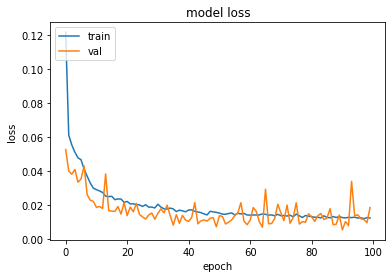

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# predictions
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [ ]:
test_pred

array([[ 0.79009074],
       [ 0.9297042 ],
       [ 0.9319287 ],
       [ 0.9284203 ],
       [ 0.53324145],
       [ 0.25392485],
       [ 0.25043347],
       [ 0.77380687],
       [ 0.9165556 ],
       [ 0.9369998 ],
       [ 0.6756488 ],
       [ 0.26076353],
       [ 0.26742458],
       [ 0.2391766 ],
       [ 0.7557181 ],
       [ 0.7774536 ],
       [ 0.7920146 ],
       [ 0.78058505],
       [ 0.56376374],
       [ 0.15559046],
       [ 0.16648424],
       [ 0.7680683 ],
       [ 0.7487146 ],
       [ 0.76954204],
       [ 0.75951654],
       [ 0.74513894],
       [ 0.13279894],
       [ 0.7557705 ],
       [ 0.76311517],
       [ 0.8173212 ],
       [ 0.81458217],
       [ 0.7663759 ],
       [ 0.18724927],
       [ 0.18387035],
       [ 0.68507993],
       [ 0.7675968 ],
       [ 0.6957736 ],
       [ 0.7724106 ],
       [ 0.1688096 ],
       [ 0.18248442],
       [ 0.79981756],
       [ 0.7632021 ],
       [ 0.7994863 ],
       [ 0.7730652 ],
       [ 0.7665498 ],
       [ 0

In [ ]:
# convert prediction back to normalize values
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform([y_train])
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform([y_test])

In [ ]:
# calculate RMSE
trainScore = math.sqrt(metrics.mean_squared_error(y_train[0], train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(metrics.mean_squared_error(y_test[0], test_pred[:,0]))
print('Test Score: %.2f RMSE' % (valScore))

Train Score: 303.72 RMSE
Test Score: 393.43 RMSE


In [ ]:
# Train predictions
trainpredplot = np.empty_like(df)
trainpredplot[:,:] = np.nan
trainpred = trainpredplot[time_step:len(train_pred)+time_step, :]

In [ ]:
# Test predictions
testpredPlot = np.empty_like(df)
testpredPlot[:, :] = np.nan
testpredPlot[len(train_pred)+(time_step*2)+1:len(df)-1, :] = test_pred

In [ ]:
y_test = y_test.reshape(-1)
y_test = pd.Series(y_test)

In [ ]:
y_test

0      4756.5
1      4855.0
2      4877.5
3      4777.5
4      4636.5
        ...  
125    4543.0
126    4390.0
127    4385.0
128    4289.5
129    2564.0
Length: 130, dtype: float64

In [ ]:
test_pred = test_pred.reshape(-1)
test_pred = pd.Series(test_pred)
test_pred

0      4429.770996
1      4800.724121
2      4806.634766
3      4797.312500
4      3747.322754
          ...     
125    4374.094238
126    4518.860840
127    4404.262207
128    4308.959473
129    2891.980225
Length: 130, dtype: float32

In [ ]:
#np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [ ]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

mse = metrics.mean_squared_error(y_test, test_pred)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 393.427854


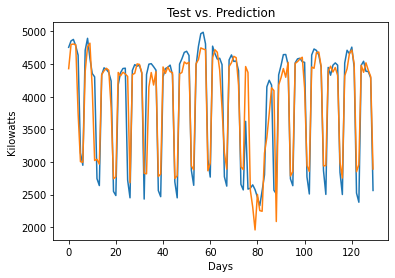

In [ ]:
plt.plot(y_test)
plt.plot(test_pred)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Test vs. Prediction")
plt.show()